In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [156]:
# Read The DataSet
loan_data = pd.read_csv("D:\\Upgrad\\Lending Case Study\\DataSet\\loan.csv")

In [157]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [158]:
loan_data.shape

(39717, 111)

In [159]:
# Cheching Null Values

loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [160]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [161]:
print("NUMBER OF DUPLICATE RECORDS ARE = ",loan_data.duplicated().sum())

NUMBER OF DUPLICATE RECORDS ARE =  0


In [162]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

## It is observed that there are a lot of columns with all null values. Let's first remove them

In [163]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## There are several columns which are single valued.
      . They cannot contribute to our analysis in any way. So removing them.

In [164]:
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


## Now we have 48 columns out of which some correspond to the post approval of loan
          > We are analyzing the user details and the driving factors of loan defaulting before approving loan.
          > So we can safely remove the columns / variables corresponding to that scenario.
          > Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code",           "last_credit_pull_d","addr_state".
          > The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them.
          > "desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
          > "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them.
          > "funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.

In [165]:
loan_data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)


In [166]:
loan_data.shape

(39717, 21)

In [167]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [168]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

## Box Plot and distribution plot for various continious variable 

Text(0.5, 1.0, 'pub_rec Distribution')

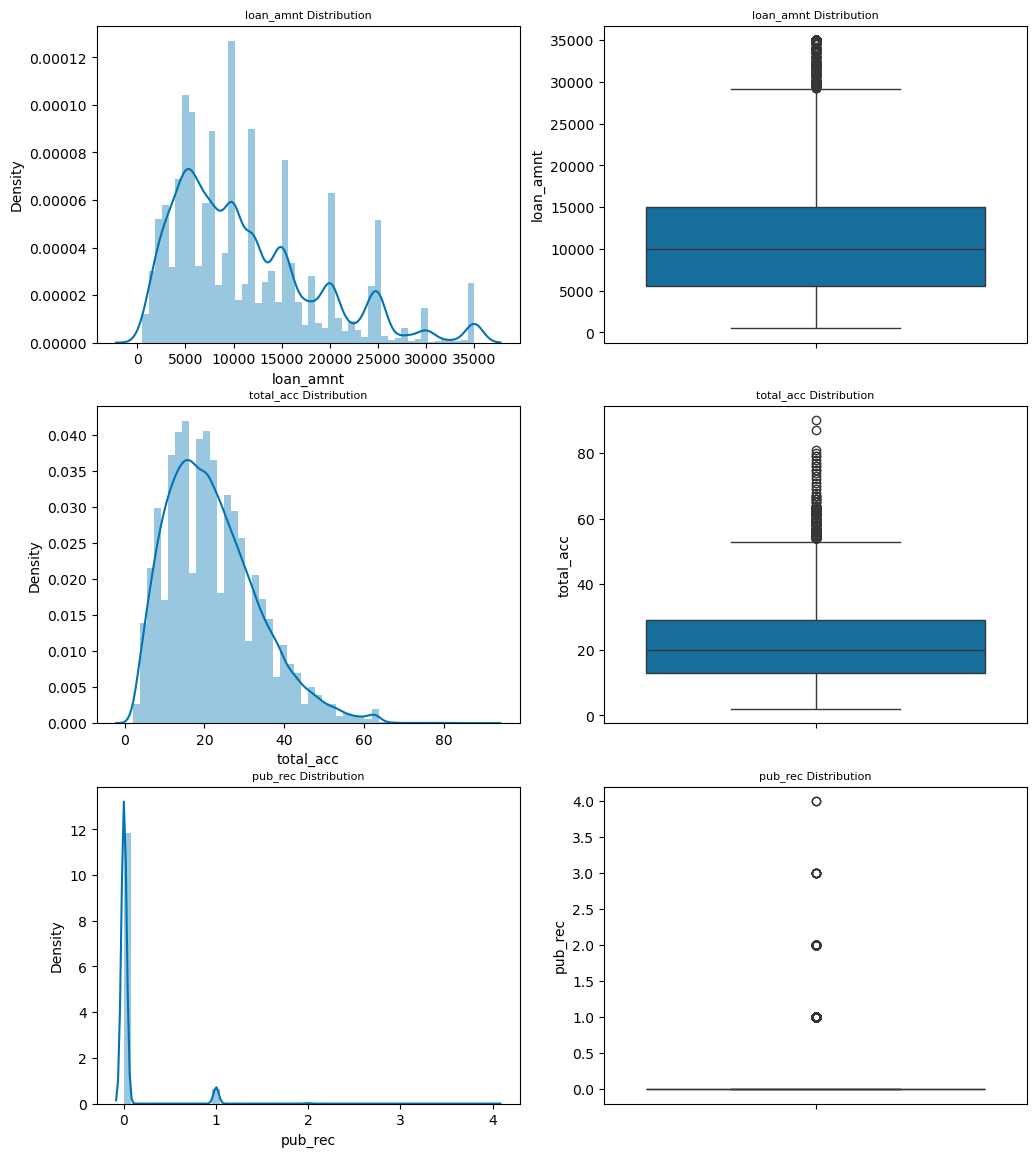

In [169]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(loan_data['loan_amnt'] , ax=axes[0][0])
a.set_title("loan_amnt Distribution",fontsize=8)

a = sns.boxplot(loan_data['loan_amnt'] , orient = "v" , ax=axes[0][1])
a.set_title("loan_amnt Distribution",fontsize=8)

a = sns.distplot(loan_data['total_acc'] , ax=axes[1][0])
a.set_title("total_acc Distribution",fontsize=8)

a = sns.boxplot(loan_data['total_acc'] , orient = "v" , ax=axes[1][1])
a.set_title("total_acc Distribution",fontsize=8)

a = sns.distplot(loan_data['pub_rec'] , ax=axes[2][0])
a.set_title("pub_rec Distribution",fontsize=8)

a = sns.boxplot(loan_data['pub_rec'] , orient = "v" , ax=axes[2][1])
a.set_title("pub_rec Distribution",fontsize=8)

Text(0.5, 1.0, 'dti Distribution')

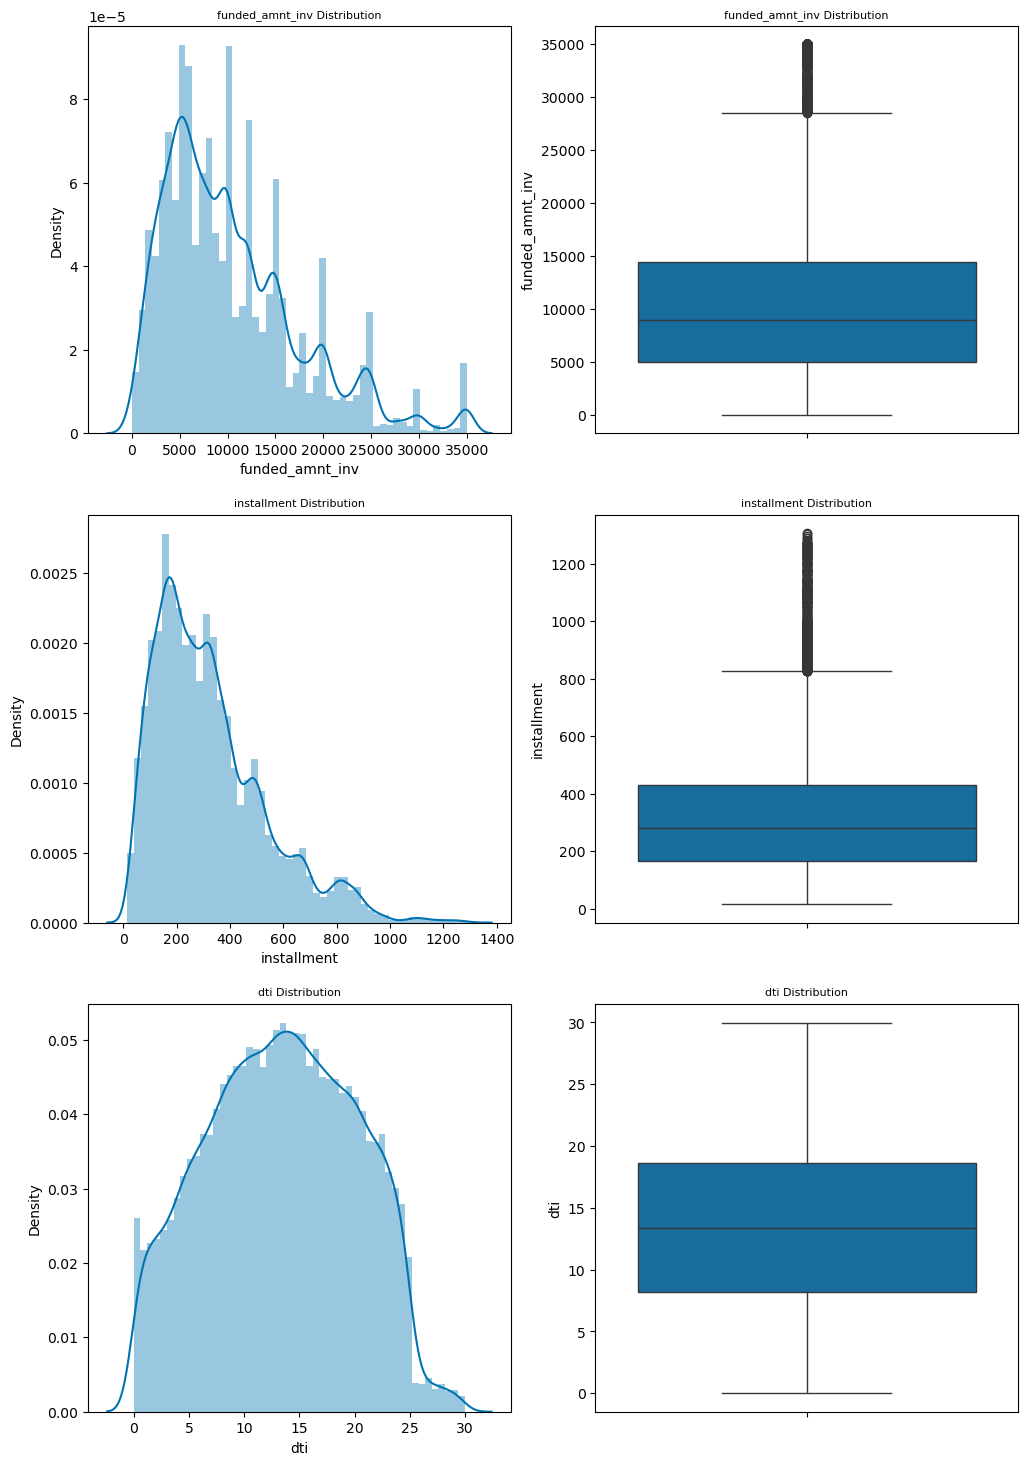

In [170]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 18)

a = sns.distplot(loan_data['funded_amnt_inv'] , ax=axes[0][0])
a.set_title("funded_amnt_inv Distribution",fontsize=8)

a = sns.boxplot(loan_data['funded_amnt_inv'] , orient = "v" , ax=axes[0][1])
a.set_title("funded_amnt_inv Distribution",fontsize=8)

a = sns.distplot(loan_data['installment'] , ax=axes[1][0])
a.set_title("installment Distribution",fontsize=8)

a = sns.boxplot(loan_data['installment'] , orient = "v" , ax=axes[1][1])
a.set_title("installment Distribution",fontsize=8)

a = sns.distplot(loan_data['dti'] , ax=axes[2][0])
a.set_title("dti Distribution",fontsize=8)

a = sns.boxplot(loan_data['dti'] , orient = "v" , ax=axes[2][1])
a.set_title("dti Distribution",fontsize=8)

## From above Graphs It is clear that most of the data contain the outliers and most of them are left skwed 

- From above boxplot it is clear that all the values lies above the 75% quartile range.
- Only DTI is the center skwed with 0 outliers that means all the values lies in between 25 to 75 % of quartile range
- AS the most of the variable is lest skwed so we need to do boxplot outliers treatment to fit all the values within the range.

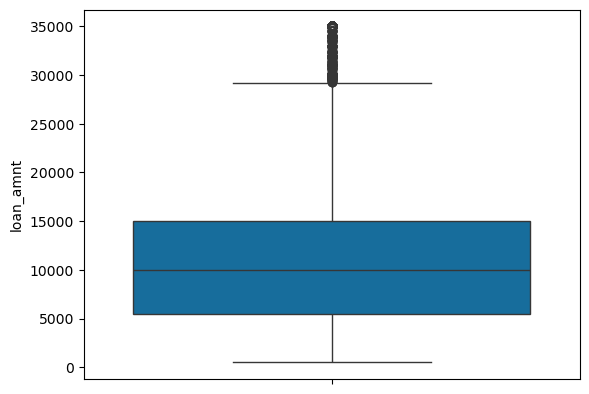

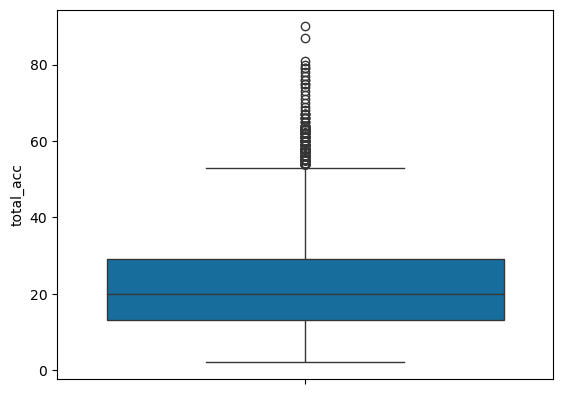

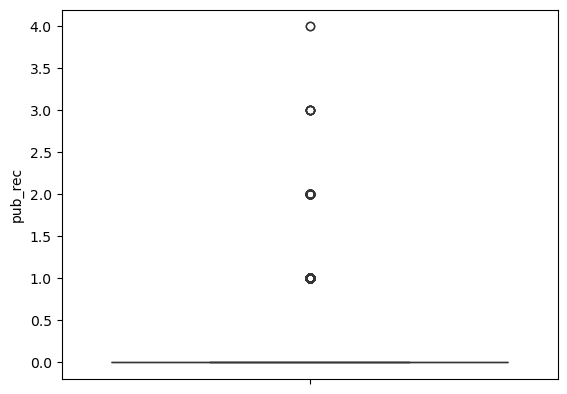

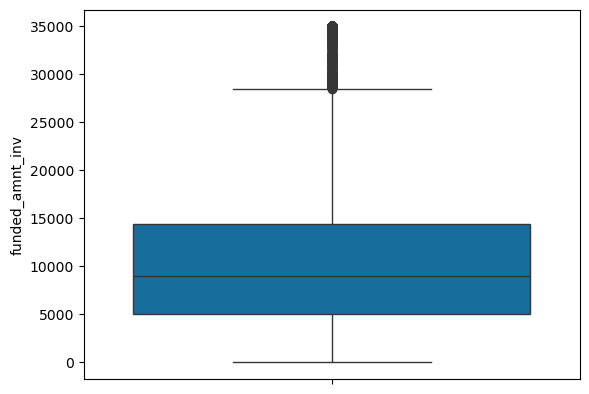

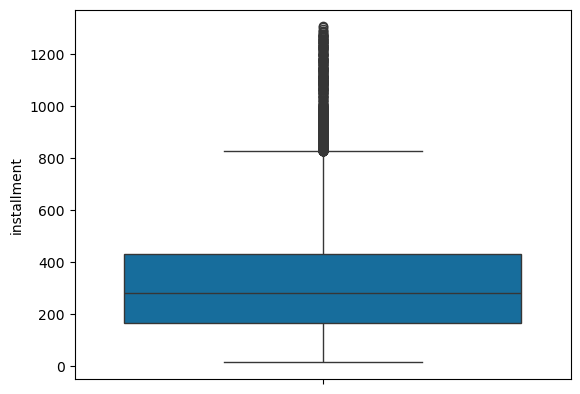

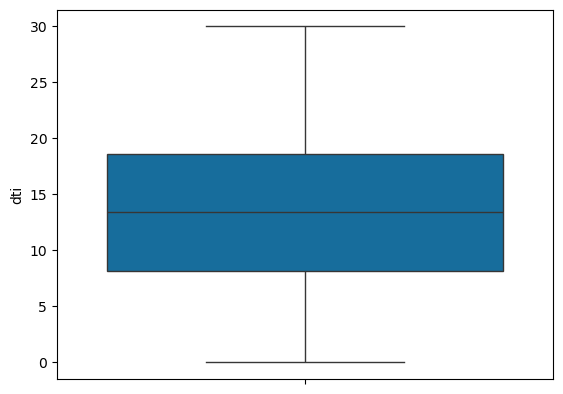

In [171]:
cols = ['loan_amnt','total_acc', 'pub_rec', 'funded_amnt_inv', 'installment', 'dti',
        ]
for i in cols:
    sns.boxplot(loan_data[i],whis=1.5)
    plt.show();

In [172]:
### Outlier treatment :
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [173]:
for column in loan_data[cols].columns:
    lr,ur=remove_outlier(loan_data[column])
    loan_data[column]=np.where(loan_data[column]>ur,ur,loan_data[column])
    loan_data[column]=np.where(loan_data[column]<lr,lr,loan_data[column])

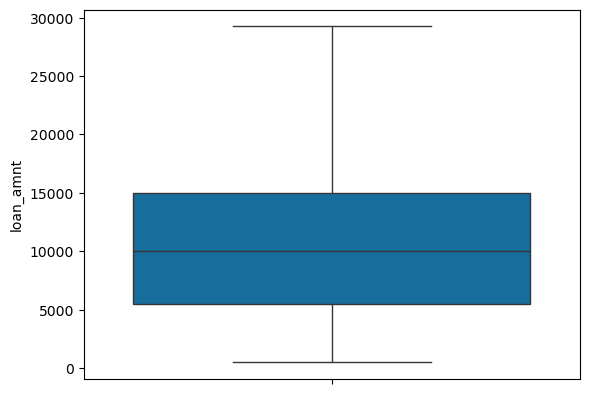

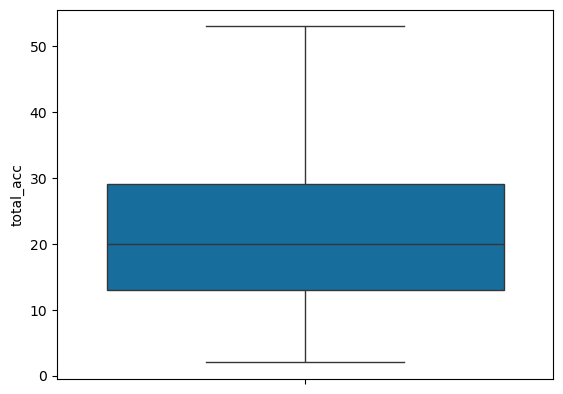

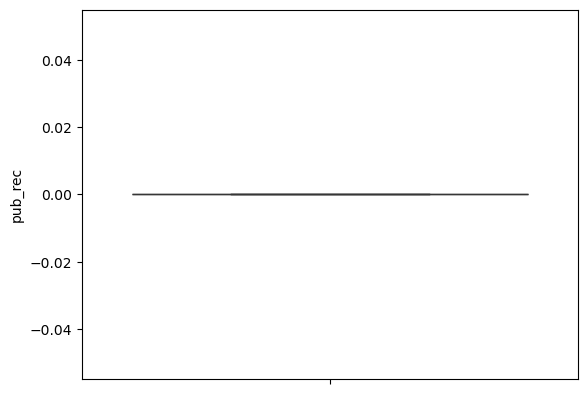

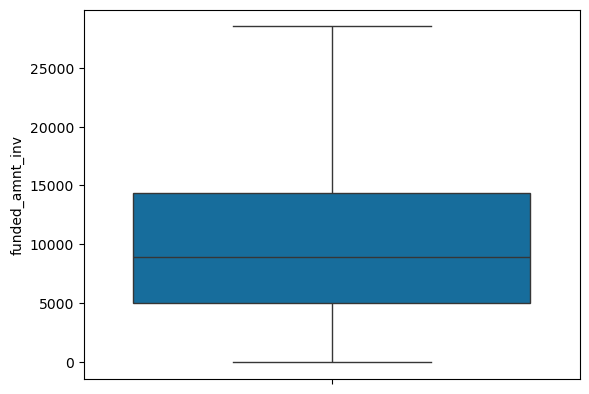

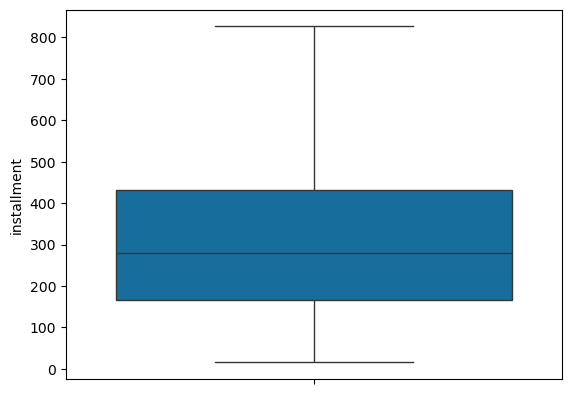

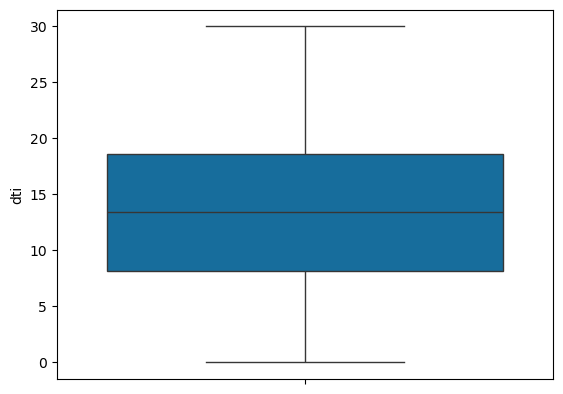

In [174]:
cols = ['loan_amnt','total_acc', 'pub_rec', 'funded_amnt_inv', 'installment', 'dti',
        ]
for i in cols:
    sns.boxplot(loan_data[i],whis=1.5)
    plt.show();

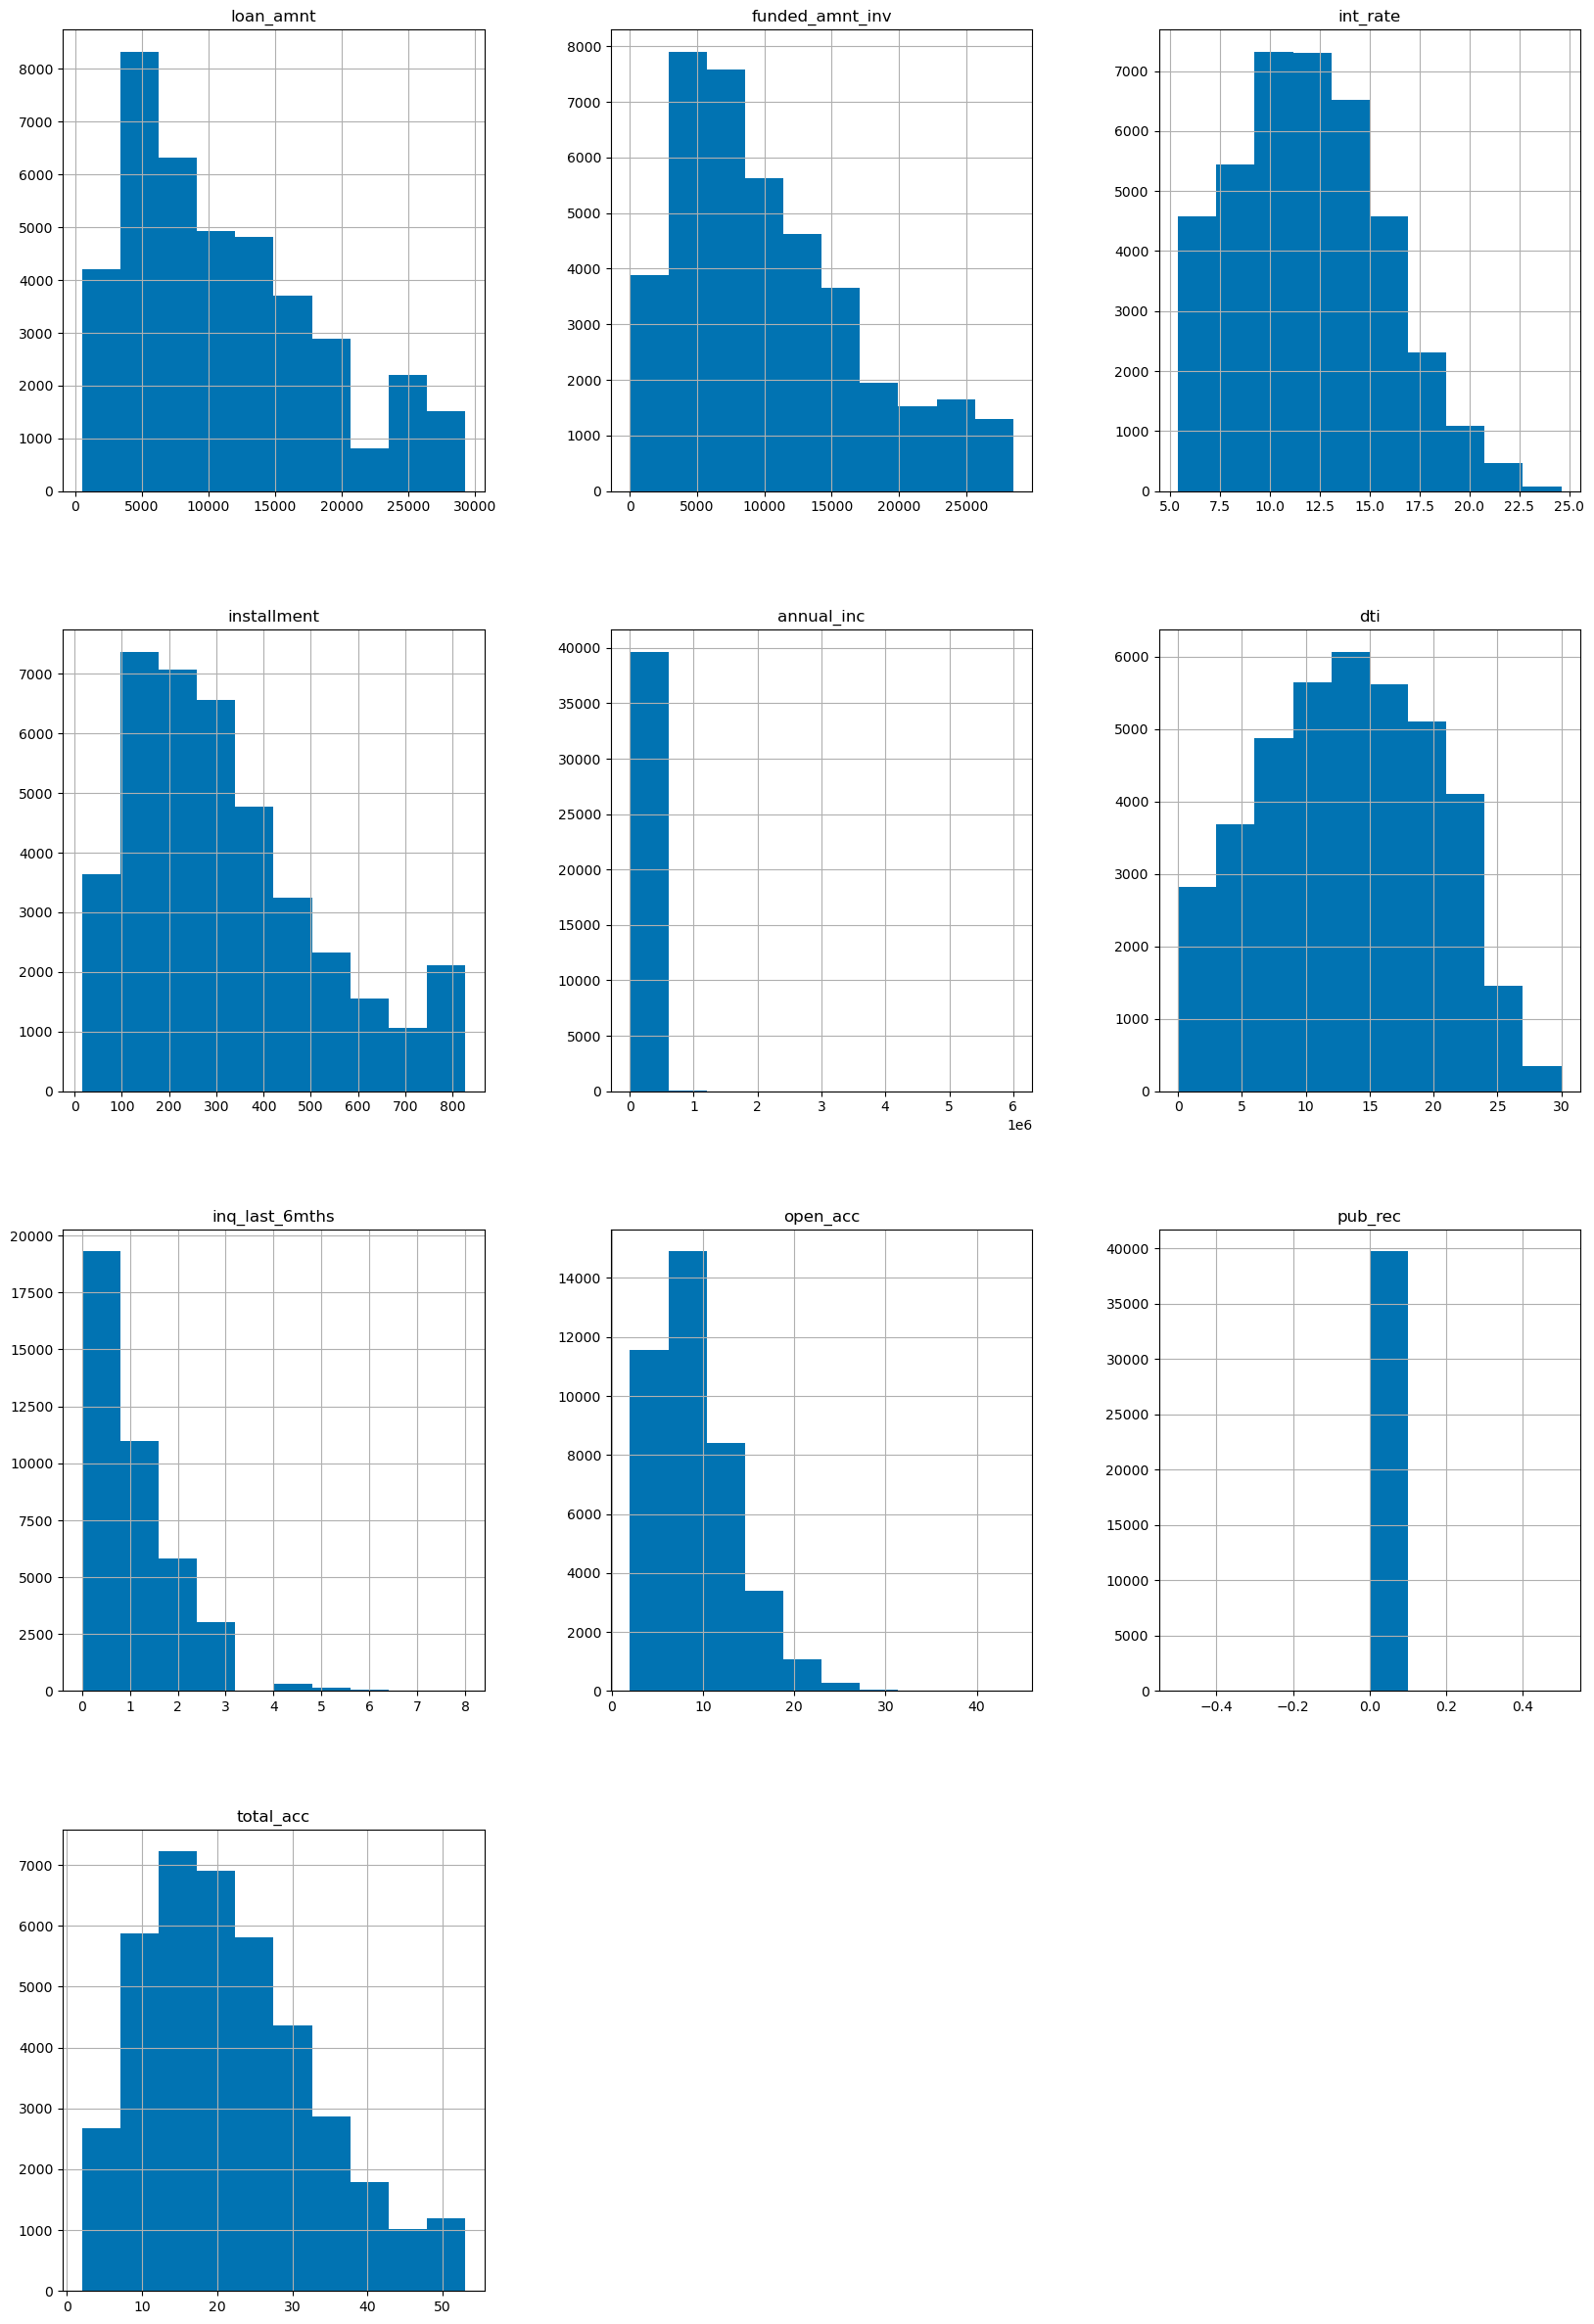

In [175]:
loan_data.hist(figsize=(20,30));

## Visualising Categorical Data

<Axes: xlabel='loan_status', ylabel='count'>

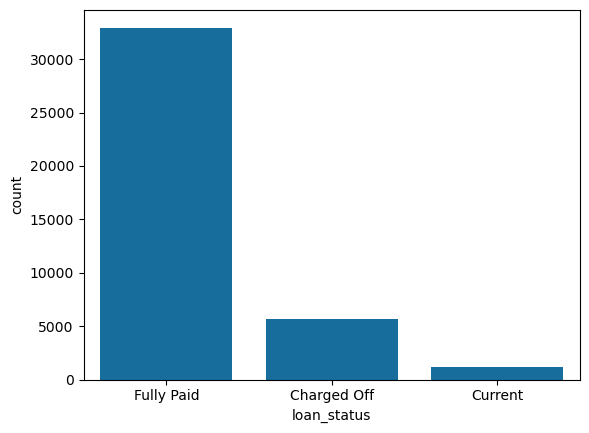

In [176]:
sns.countplot(x = 'loan_status', data = loan_data)

### The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
- We cannot make anything up for the current loans. 
- To exclude that data , removing the records with current loan status

In [177]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

<Axes: xlabel='loan_status', ylabel='count'>

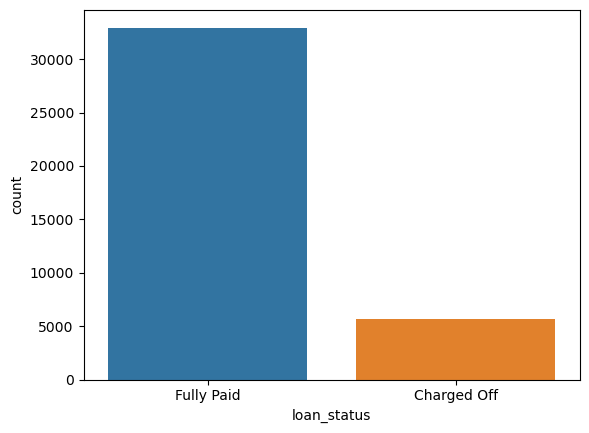

In [178]:
sns.countplot(x = 'loan_status', data = loan_data,palette="tab10")

In [179]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

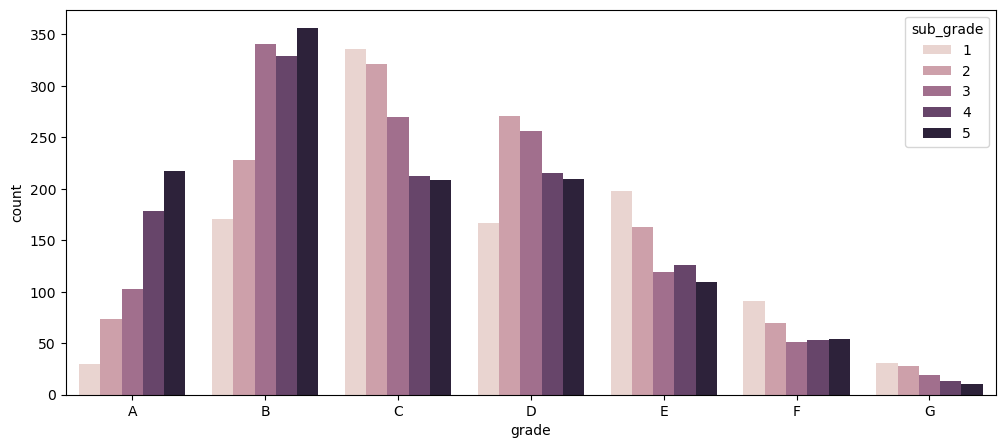

In [181]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

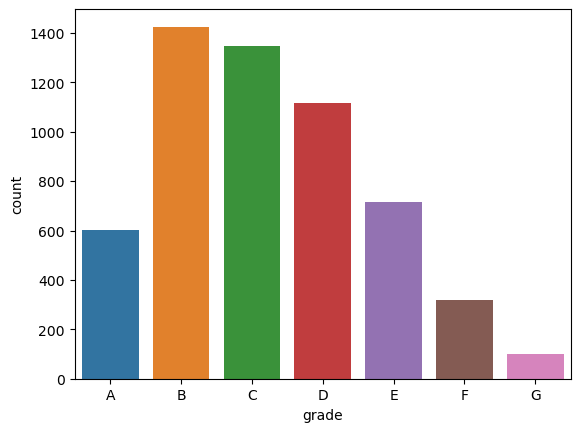

In [90]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],palette='tab10')

In [91]:
#checking unique values for home_ownership
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [92]:
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<Axes: xlabel='home_ownership', ylabel='count'>

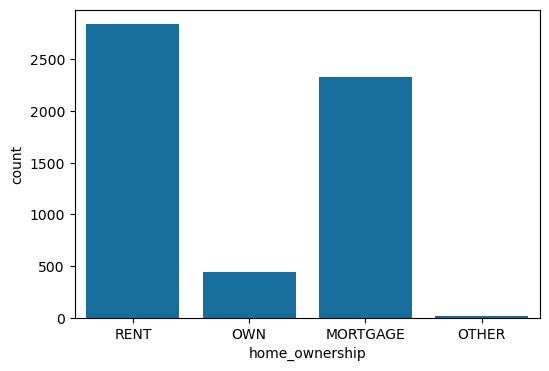

In [93]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set()
ax.title
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [94]:
loan_data['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='purpose'>

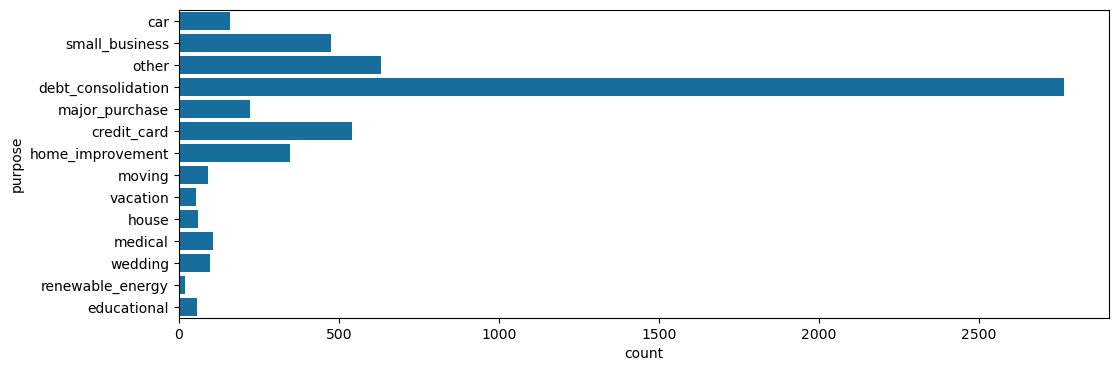

In [182]:
fig, ax = plt.subplots(figsize = (12,4))
ax.set()
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])


TypeError: catplot() got multiple values for argument 'data'

## Bivariate analysis

In [105]:
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

<Axes: xlabel='emp_length', ylabel='count'>

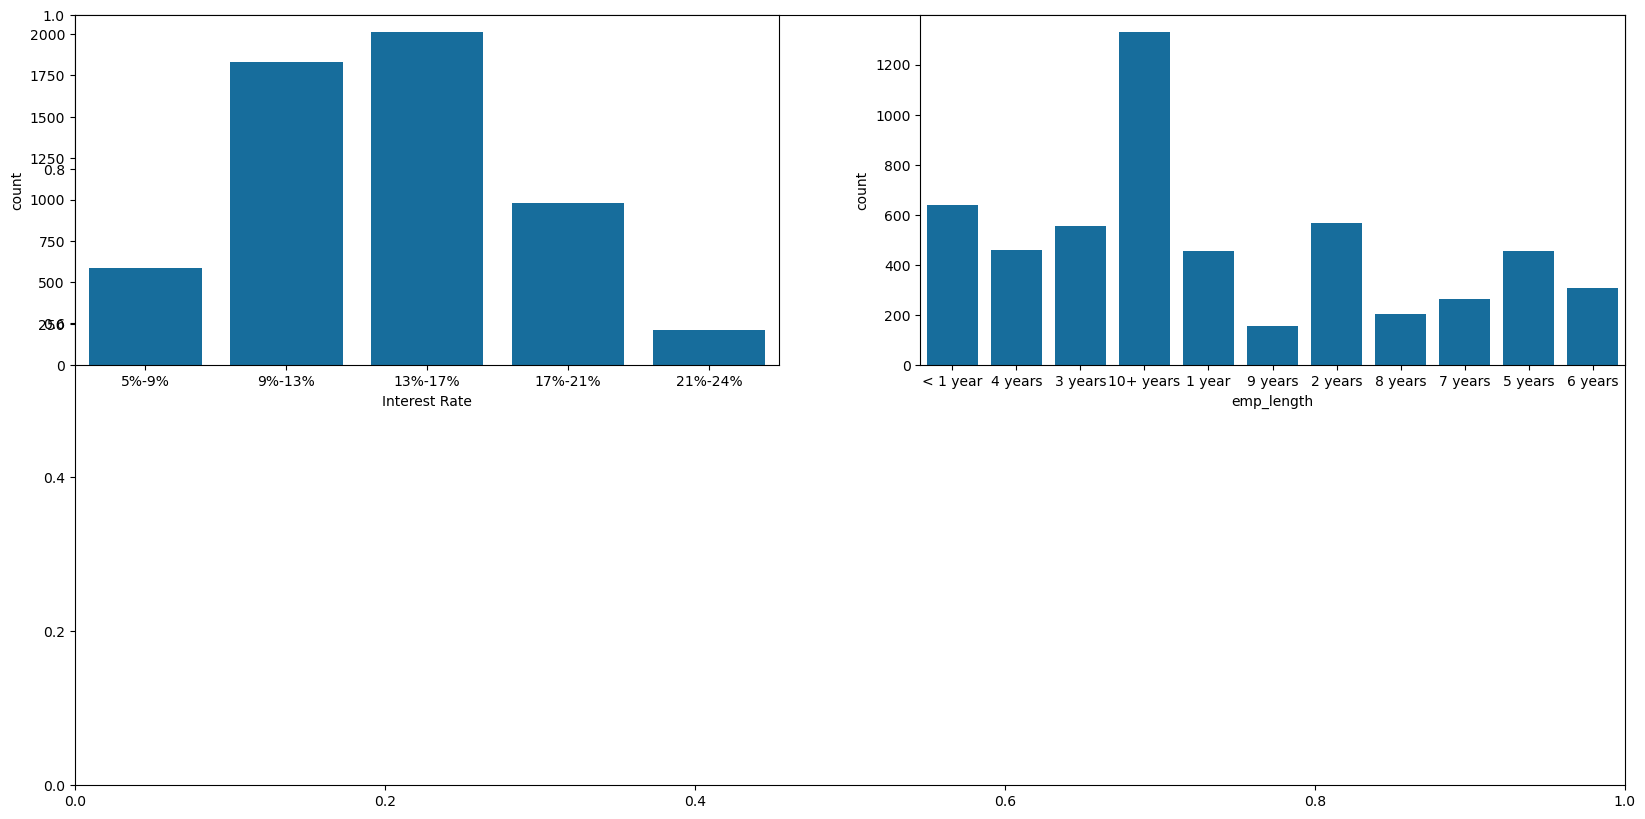

In [109]:
fig, ax = plt.subplots(figsize = (20,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

In [110]:
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

<Axes: xlabel='open_acc_groups', ylabel='count'>

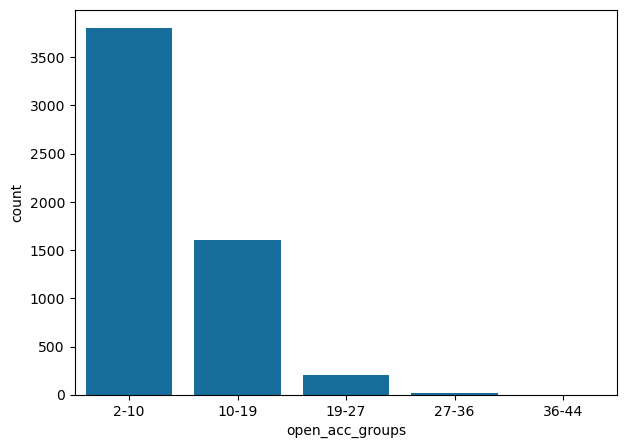

In [113]:
fig, ax = plt.subplots(figsize = (7,5))

sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

## Extracting Month and Year 


In [115]:
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

<Axes: xlabel='issue_year', ylabel='count'>

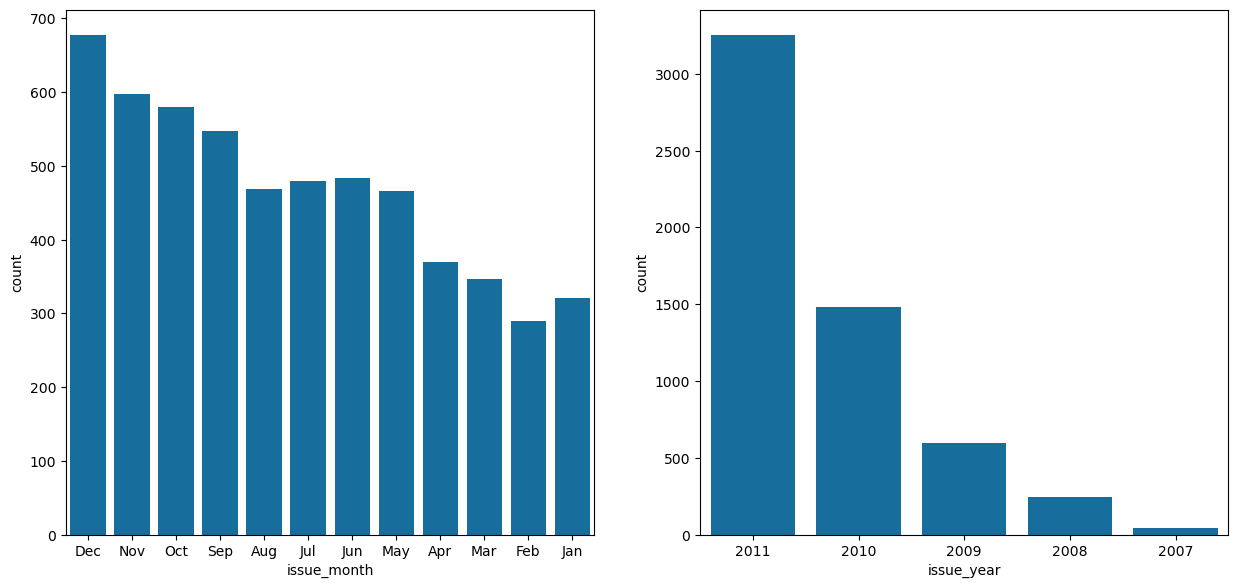

In [116]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

### Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years

### Analyzing installment,dti, loan_amnt 


In [117]:
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

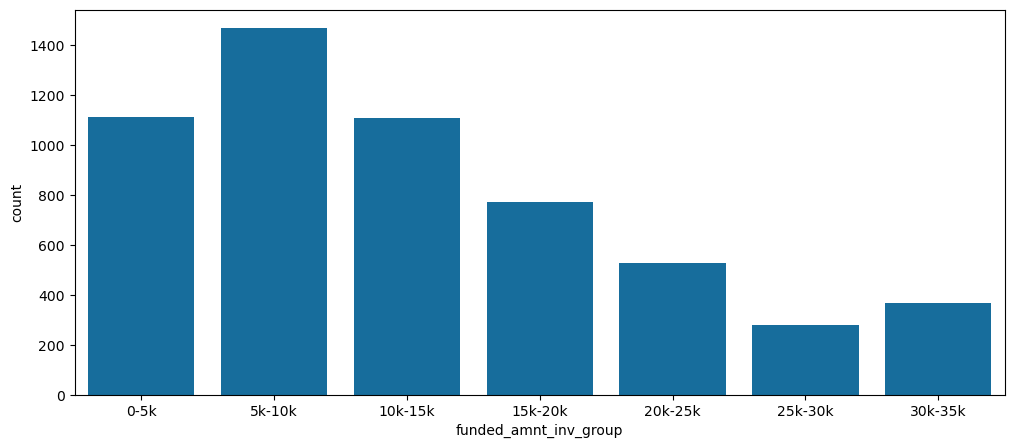

In [119]:
fig,ax = plt.subplots(figsize = (12,5))

sns.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

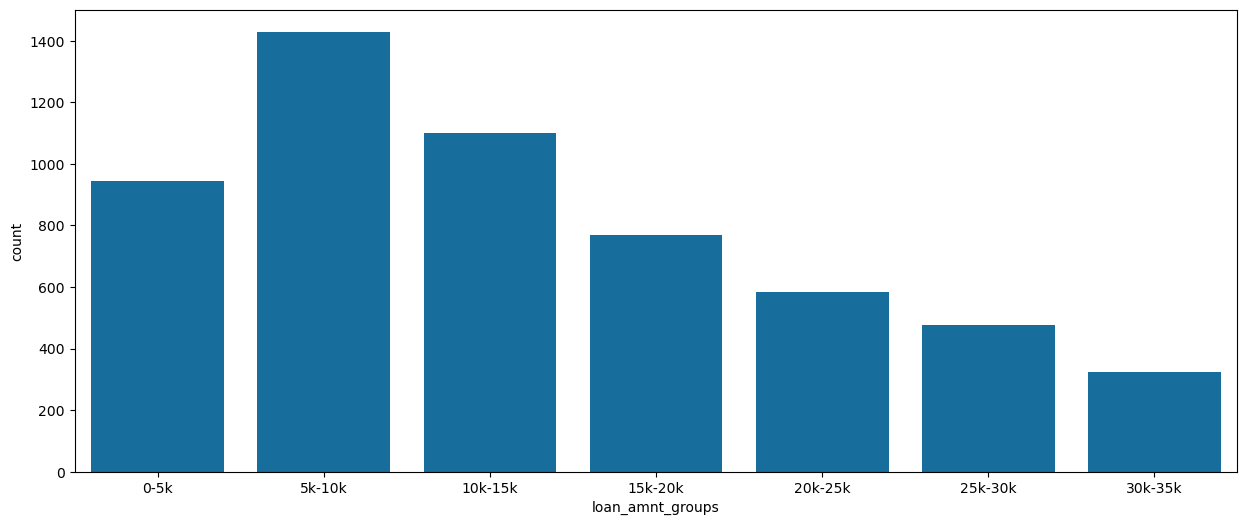

In [121]:
fig,ax = plt.subplots(figsize = (15,6))

sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

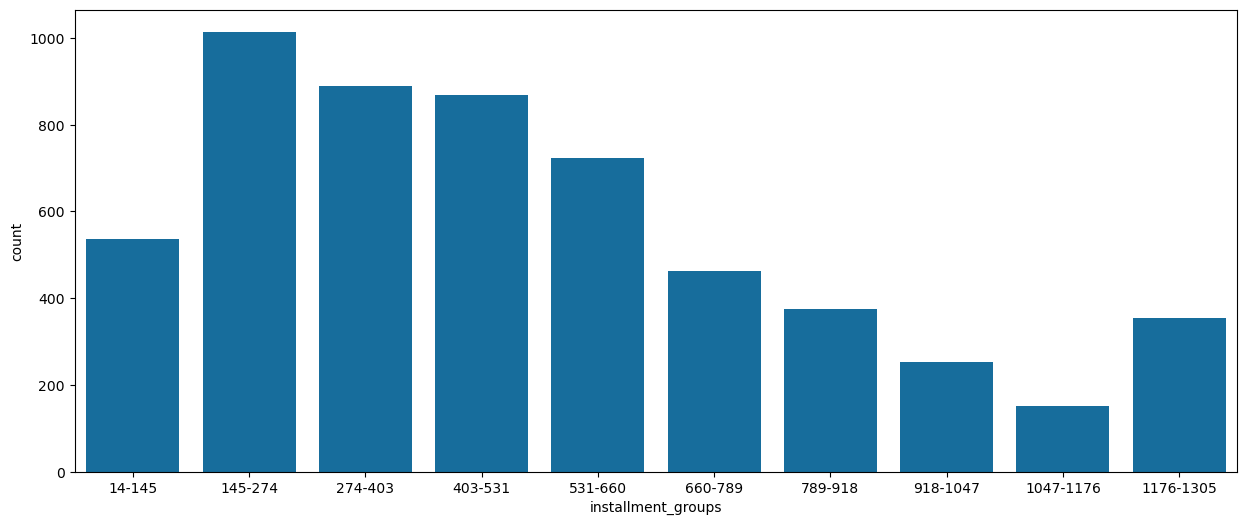

In [123]:
fig,ax = plt.subplots(figsize = (15,6))

sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

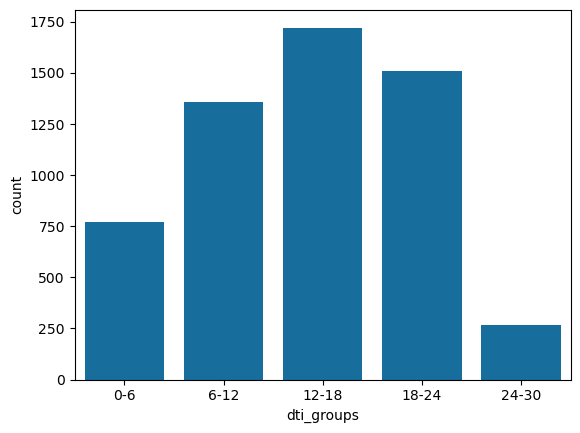

In [124]:
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

# Observations

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 

- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have 20-37 open_acc|
- Applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the purpose is 'debt_consolidation'
- Dti is between 12-18

In [125]:
## Analysing annual income with other columns for more insights 

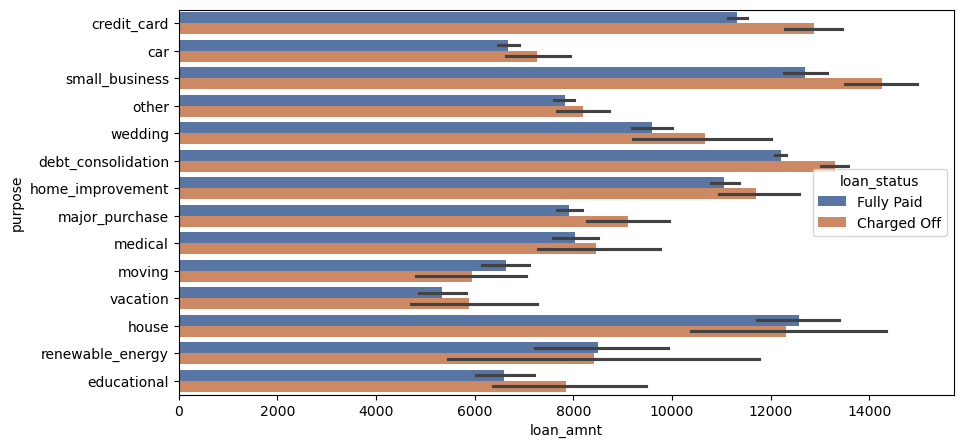

In [183]:
plt.figure(figsize=(10,5))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="deep")
plt.show()

### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest. 
- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

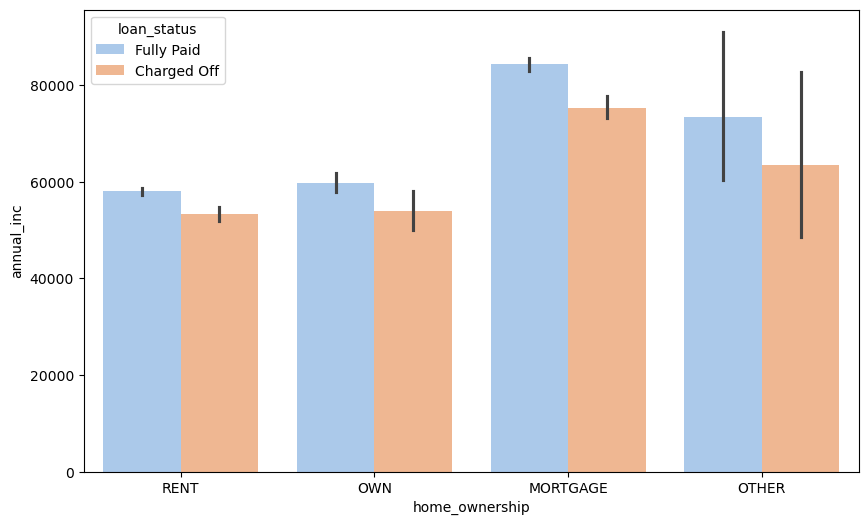

In [132]:
plt.figure(figsize=(10,6))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

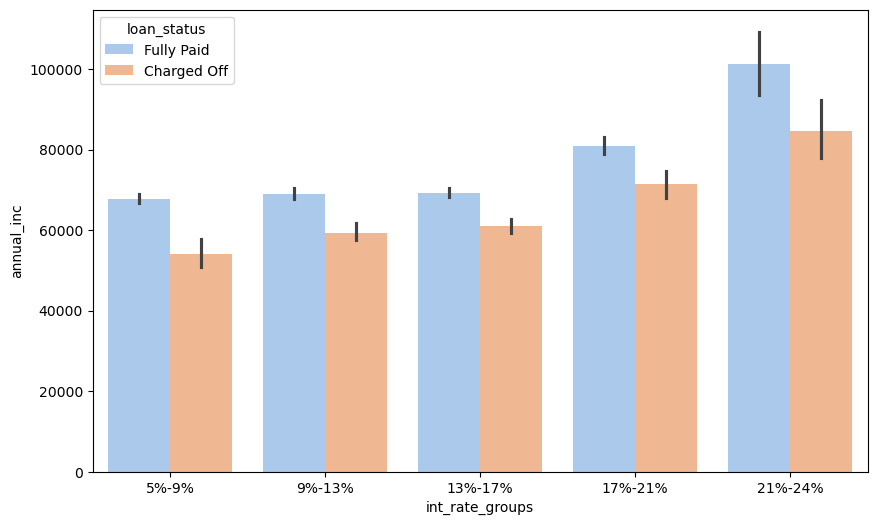

In [133]:
plt.figure(figsize=(10,6))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

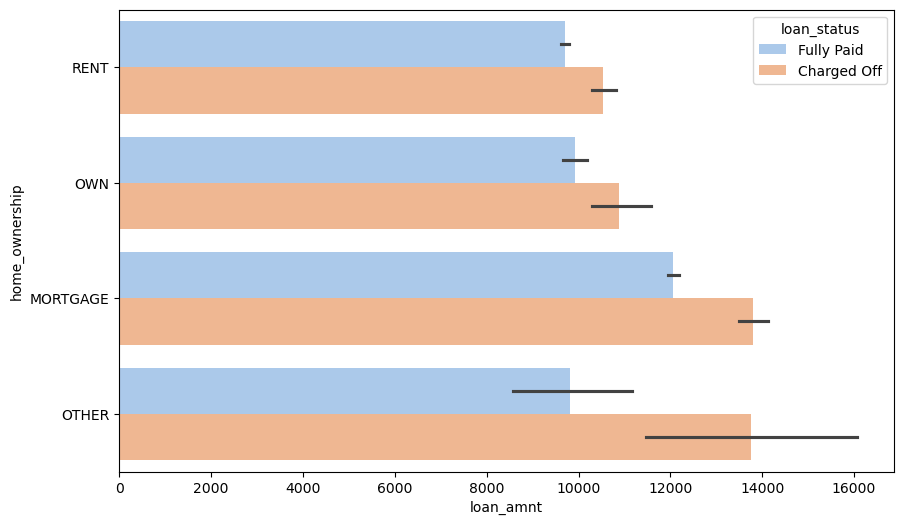

In [134]:
plt.figure(figsize=(10,6))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

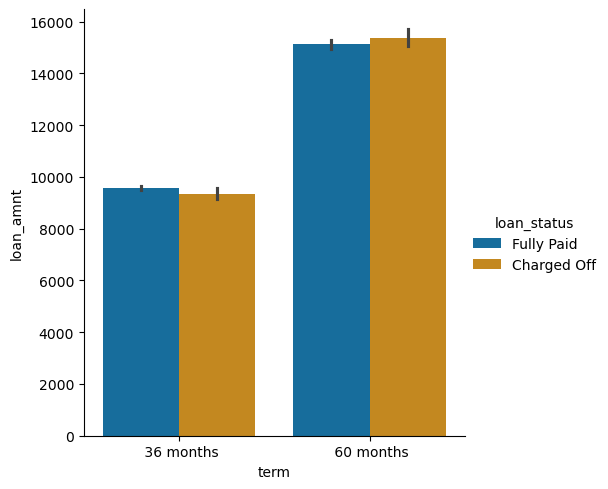

In [135]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')

# Observations

### The above analysis with respect to the charged off loans. There is a more probability of defaulting when : 

- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When employment length is 10yrs and loan amount is 12k-14k 
